Source is available on [Github](https://github.com/stephanie-w/brainscribble/tree/master/source).

In [44]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


The iris dataset consists of measurements of three different species of irises.
scikit-learn embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays.

In [45]:
from sklearn.datasets import load_iris
iris = load_iris()

In [46]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [47]:
print iris.data.shape
print iris.target.shape

(150, 4)
(150,)


## Exloring the dataset

The target classes to predict are iris classification:

* setosa
* versicolor
* virginica

In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

The features in the iris dataset are :

* sepal length
* sepal width
* petal length
* petal width

In [49]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [50]:
x_index = 2 #Petal Length
y_index = 3 #Petal Width
iris.data[:,x_index] # Petal Length values

array([ 1.4,  1.4,  1.3,  1.5,  1.4,  1.7,  1.4,  1.5,  1.4,  1.5,  1.5,
        1.6,  1.4,  1.1,  1.2,  1.5,  1.3,  1.4,  1.7,  1.5,  1.7,  1.5,
        1. ,  1.7,  1.9,  1.6,  1.6,  1.5,  1.4,  1.6,  1.6,  1.5,  1.5,
        1.4,  1.5,  1.2,  1.3,  1.5,  1.3,  1.5,  1.3,  1.3,  1.3,  1.6,
        1.9,  1.4,  1.6,  1.4,  1.5,  1.4,  4.7,  4.5,  4.9,  4. ,  4.6,
        4.5,  4.7,  3.3,  4.6,  3.9,  3.5,  4.2,  4. ,  4.7,  3.6,  4.4,
        4.5,  4.1,  4.5,  3.9,  4.8,  4. ,  4.9,  4.7,  4.3,  4.4,  4.8,
        5. ,  4.5,  3.5,  3.8,  3.7,  3.9,  5.1,  4.5,  4.5,  4.7,  4.4,
        4.1,  4. ,  4.4,  4.6,  4. ,  3.3,  4.2,  4.2,  4.2,  4.3,  3. ,
        4.1,  6. ,  5.1,  5.9,  5.6,  5.8,  6.6,  4.5,  6.3,  5.8,  6.1,
        5.1,  5.3,  5.5,  5. ,  5.1,  5.3,  5.5,  6.7,  6.9,  5. ,  5.7,
        4.9,  6.7,  4.9,  5.7,  6. ,  4.8,  4.9,  5.6,  5.8,  6.1,  6.4,
        5.6,  5.1,  5.6,  6.1,  5.6,  5.5,  4.8,  5.4,  5.6,  5.1,  5.1,
        5.9,  5.7,  5.2,  5. ,  5.2,  5.4,  5.1])

In [51]:
iris.target # Iris Classification values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

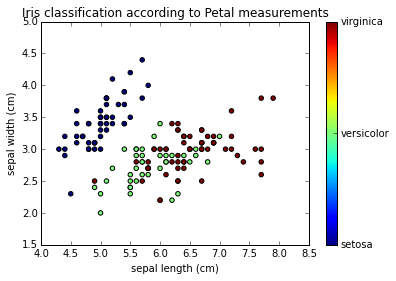

In [91]:
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.title("Iris classification according to Petal measurements")

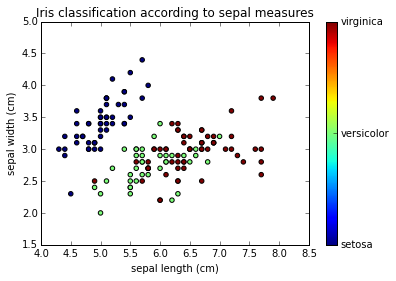

In [55]:
x_index = 0 # Sepal Lenght
y_index = 1 # Sepal Width
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.title("Iris classification according to sepal measurements")

## Using classification algorithm 

### KNeighborsClassifier

The simplest possible classifier is the nearest neighbor.

#### Fitting the model

In [93]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(iris.data, iris.target) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

#### Doing a predicition

In [94]:
result = knn.predict([[3, 5, 4, 2],]) # What is the iris class for 3cm x 5cm sepal and 4cm x 2cm petal?
print iris.target_names[result]

['virginica']


#### Exploring the results

Let's draw the classification region according to sepal measurements.  
First, let's fit the model using the two first features only:

In [95]:
X = iris.data[:, :2] #Working with the two first features : sepal length and sepal width
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

Then, let's build a input data matrix containing continuous values of sepal length and width (from min to max) and aply the predict function to it:

In [96]:
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1 #min and max sepal length
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1 #min and max sepal width
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Let's put the result into a color plot:

(4.2000000000000002, 8.0, 1.8999999999999999, 4.5)

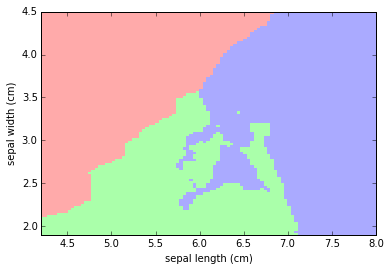

In [98]:
Z = Z.reshape(xx.shape)
plt.figure()
# Create color maps for 3-class classification problem
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

Let's add the actual values of iris sepal lenght/width vs classification to the color map:

(4.0099999999999998, 8.1899999999999995, 1.77, 4.6299999999999999)

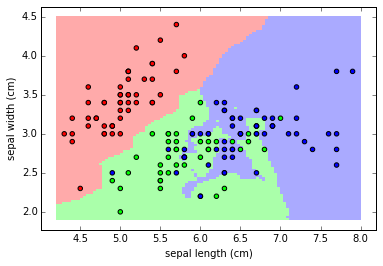

In [99]:
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

### Support Vector Classifier (SVC)

In [138]:
from sklearn import svm

clf = svm.LinearSVC(loss = 'l2')
clf.fit(iris.data, iris.target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

#### Doing a predicition

In [139]:
result = clf.predict([[3, 5, 4, 2],])# What is the iris class for 3cm x 5cm sepal and 4cm x 2cm petal?
print iris.target_names[result]

['virginica']


In [156]:
clf = svm.SVC(kernel="linear")
clf.fit(iris.data, iris.target)
result = clf.predict([[3, 5, 4, 2],])# What is the iris class for 3cm x 5cm sepal and 4cm x 2cm petal?
print iris.target_names[result]

['versicolor']


### Exploring different classifiers (kernels)

In [117]:
X = iris.data[:, :2] #Working with the two first features : sepal length and sepal width
y = iris.target

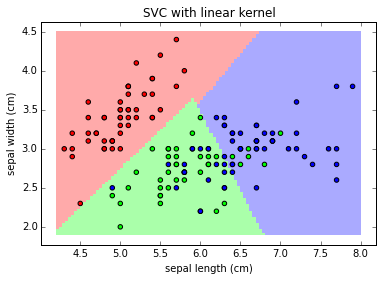

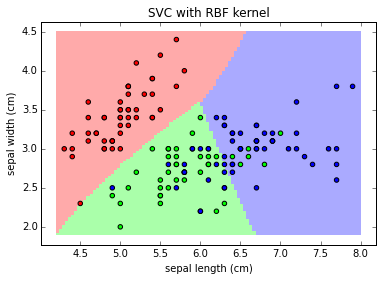

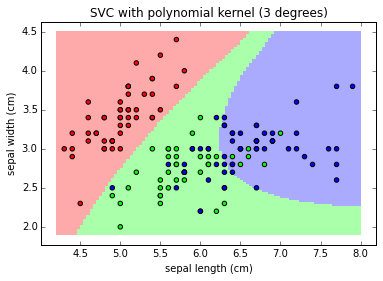

In [155]:
def plot_iris_svc(kernel, X, y, title, **params):
    C = 1.0  # SVM regularization parameter
    clf = svm.SVC(kernel=kernel, C=C, **params)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    #Plot training points as  well
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.axis('tight')
    plt.title(title)

plot_iris_svc('linear', X, y, 'SVC with linear kernel') 
plot_iris_svc('rbf', X, y, 'SVC with RBF kernel')
plot_iris_svc('poly', X, y, "SVC with polynomial kernel (3 degrees)", degree=3)

Note:
The linear models LinearSVC() and SVC(kernel='linear') yield slightly different decision boundaries. This can be a consequence of the following differences:

* LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
* LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.
